In [2]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# Specification

In [3]:
POINTING_ACCURACY = 5 * np.pi/180 # radians

# Design

In [40]:
class Platform:
    def __init__(self, vertices=3, side_len=3, center=np.array([0,0,0]), weight=50):
        ang = 2 * np.pi / vertices
        self._vertices = side_len * np.array([[np.cos(i*ang), np.sin(i*ang), 0] for i in range(vertices)])
        self._circuit = np.array(list(range(vertices)) + [0])
        self.sides = np.array([self._vertices[self._circuit[i+1]]-self._vertices[self._circuit[i]]
                               for i in range(vertices)])
        self.set_center(center)
    def set_center(self, center):
        self.center = center
        self.vertices = self.center + self._vertices
    def translate(self, delta):
        self.set_center(self.center + delta)
    def plot_projection(self, axes=[0,1], color='k'):
        ax1, ax2 = axes
        vertices = self.vertices[self._circuit]
        plt.plot(vertices[:,ax1], vertices[:,ax2], color)
        
class Anchors:
    def __init__(self, vertices=3, r=80, h=30, ropes=90, center=np.array([0,0,0])):
        ang = 2 * np.pi / vertices
        _vertices = np.array([[r*np.cos(i*ang), r*np.sin(i*ang), h] for i in range(vertices)])
        self.vertices = _vertices + center
        self.ropes = ropes * np.ones(self.vertices.shape[0])
    def attach_platform(self, platform):
        # XXX does not account for tip/tilt
        offsets = self.vertices - platform.vertices
        z = self.vertices[:,2] - np.sqrt(self.ropes**2 - (offsets[:,0]**2 + offsets[:,1]**2))
        dz = z - platform.center[2]
        dz = np.mean(dz) # XXX
        platform.translate(np.array([0,0,dz]))
        self.platform = platform
    def plot_projection(self, axes=[0,1], color='c'):
        ax1, ax2 = axes
        for p,a in zip(self.platform.vertices, self.vertices):
            plt.plot([p[ax1], a[ax1]], [p[ax2], a[ax2]], color)
        
PLATFORM_SIDE = 3 # m, side length of the platform
platform = Platform(side_len=PLATFORM_SIDE)
anchors = Anchors()
anchors.attach_platform(platform)

<IPython.core.display.Javascript object>


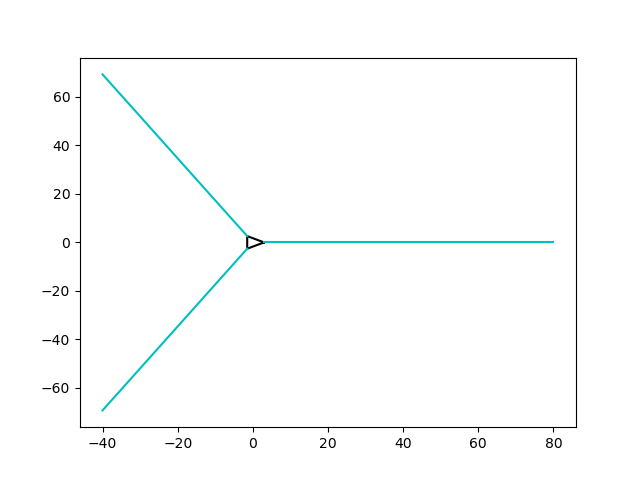

In [42]:
plt.figure()
platform.plot_projection([0,1])
anchors.plot_projection([0,1])
#for p,a in zip(platform_vertices, anchor_vertices):
#    plt.plot([p[0], a[0]], [p[1], a[1]], 'c')

# Check

In [43]:
#platform_normal = np.cross(platform_sides[0], platform_sides[1])
#platform_angle = np.arccos(platform_normal[2] / np.linalg.norm(platform_normal))
#assert(np.abs(platform_angle) < POINTING_ACCURACY)
#print(platform_normal, platform_angle, POINTING_ACCURACY)

NameError: name 'platform_sides' is not defined

<IPython.core.display.Javascript object>


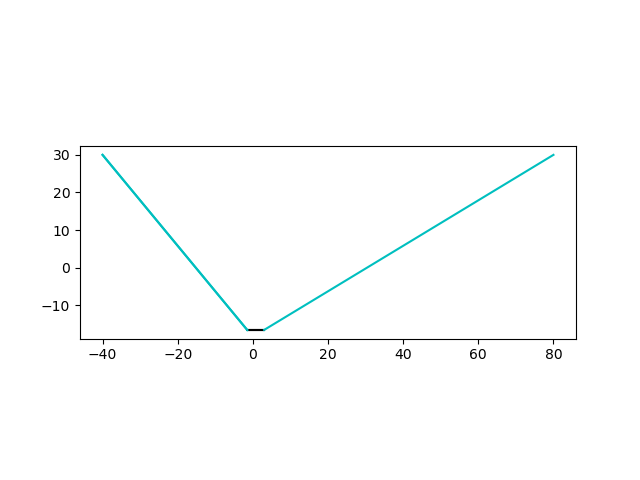

(-46.000000000000036, 86.0, -18.923690580331325, 32.32969955144435)

In [44]:
plt.figure()
platform.plot_projection([0,2])
anchors.plot_projection([0,2])
#for p,a in zip(platform_vertices, anchor_vertices):
#    plt.plot([p[0], a[0]], [p[2], a[2]], 'c')
#plt.plot([0,platform_normal[0]], [0,platform_normal[2]], 'r')
plt.axis('image')